In [5]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from datetime import timedelta
import os
import pickle
from sklearn.externals import joblib
from gensim.models import ldamodel
import gensim
%matplotlib inline

## Applying Sentiment Model

In [6]:
df_base = pd.read_csv('../data_cleaned.csv')

filename = 'models/finalized_sentiment_model.pkl'
model_pkl = open(filename, 'rb')
nb_model = pickle.load(model_pkl)

filename = '../vectorizer.pkl' #zipped as it exceeds 100MB
vectorizer_pkl = open(filename, 'rb')
nb_vectorizer = pickle.load(vectorizer_pkl)

test_vecs = nb_vectorizer.transform(df_base['text_processed'])
pred_sentiments = nb_model.predict(test_vecs)

In [7]:
prediction_nb = nb_model.predict(test_vecs)
df_base['predicted_sentiment']=prediction_nb
df_base['negative_sentiment_prob']= 1-nb_model.predict_proba(test_vecs)[:,1]

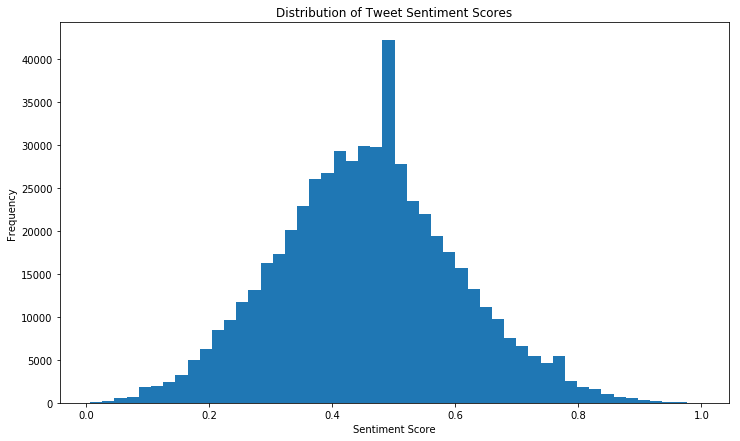

In [11]:
plt.figure(figsize=(12,7))
df_base['predicted_sentiment'].value_counts()
plt.hist(df_base['negative_sentiment_prob'], bins=50)
plt.title('Distribution of Tweet Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [17]:
df_base.to_csv('data_cleaned_w_sentiment.csv', index=False)